In [11]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.datasets import fetch_20newsgroups

In [12]:
def lematize(text):
    wr = WordNetLemmatizer()
    convertedt = [(wr.lemmatize(i,j[0].lower()) if j[0].lower() in ['a','n','v'] else wr.lemmatize(i)) 
                  if i.isalpha() else '' for i,j in pos_tag(word_tokenize(text))]
    return ' '.join(word for word in convertedt)

In [13]:
texts = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42).data[:1000]
transform_texts = np.array([])
for text in texts:
    transform_texts = np.append(transform_texts, lematize(text))

In [14]:
vectorizer = CountVectorizer(max_df=0.7, lowercase = True, stop_words='english')
count_vect = vectorizer.fit_transform(transform_texts).todense()
norm_count_vect = count_vect.copy()
norm_count_vect = norm_count_vect.astype(float)

In [15]:
for i in range(len(norm_count_vect)):
    if np.linalg.norm(norm_count_vect[i]) == 0.:
        continue
    norm_count_vect[i] = norm_count_vect[i] / np.linalg.norm(norm_count_vect[i])

In [16]:
clusters = 30
kmeans = KMeans(n_clusters=clusters, random_state=43).fit(norm_count_vect)
centers = kmeans.cluster_centers_

In [17]:
feature_names = vectorizer.get_feature_names()
wordcloud = WordCloud(relative_scaling = 1)

0


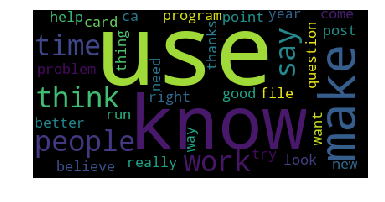

1


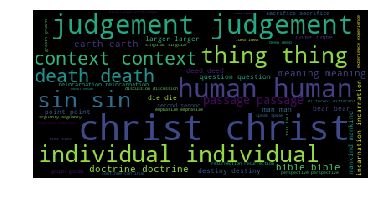

2


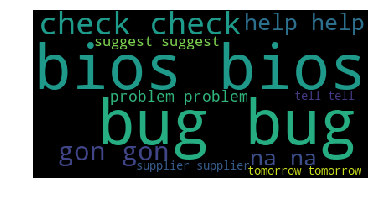

3


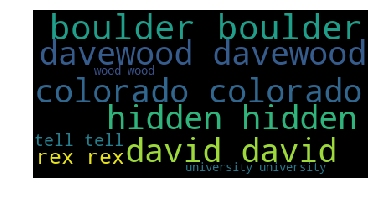

4


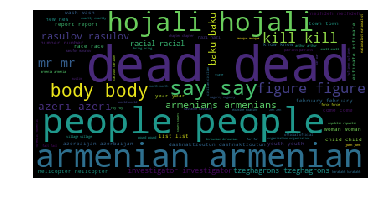

5


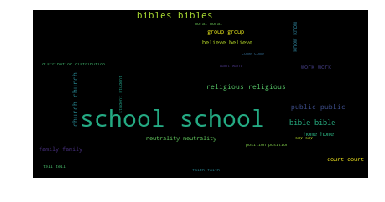

6


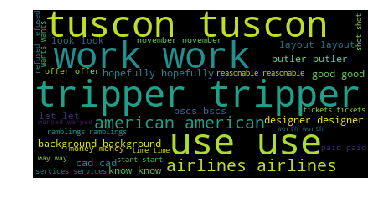

7


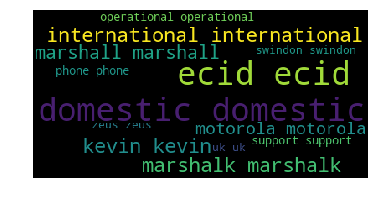

8


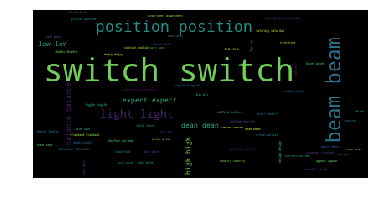

9


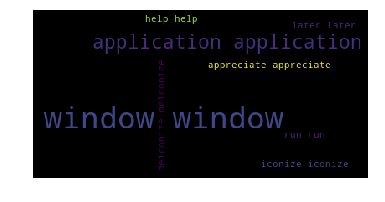

10


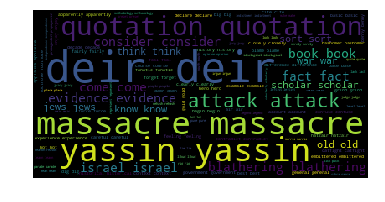

11


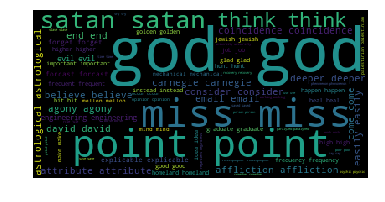

12


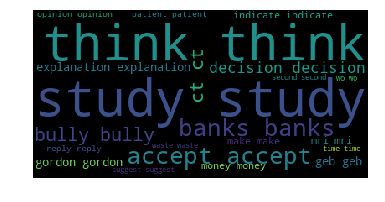

13


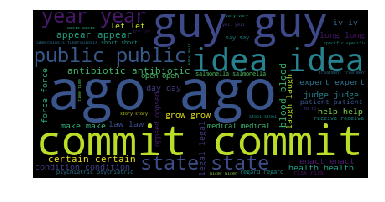

14


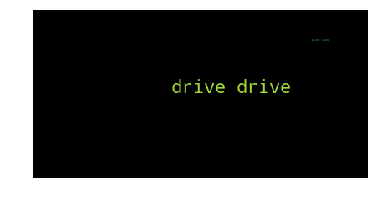

15


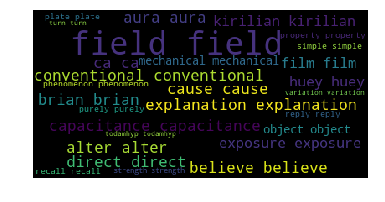

16


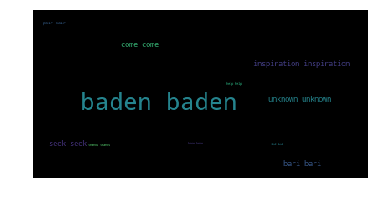

17


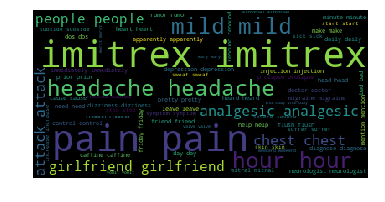

18


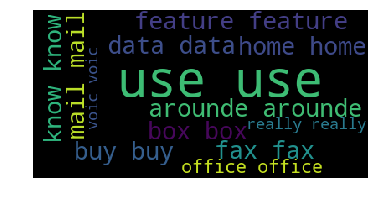

19


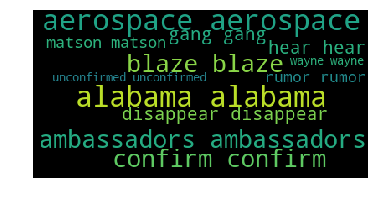

20


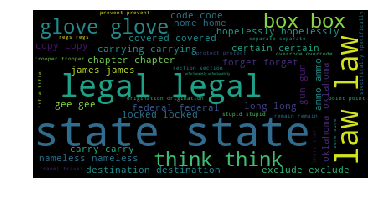

21


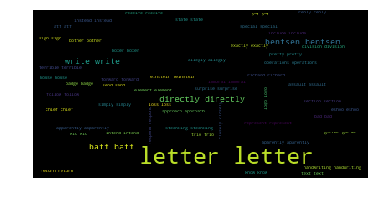

22


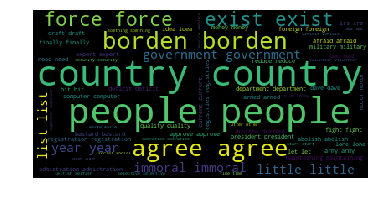

23


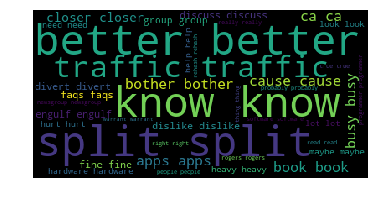

24


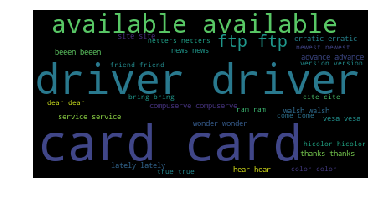

25


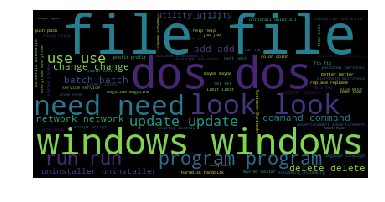

26


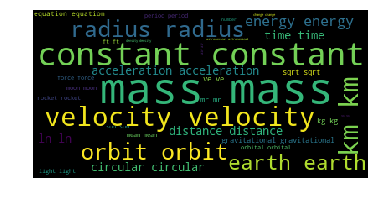

27


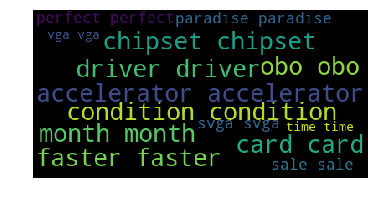

28


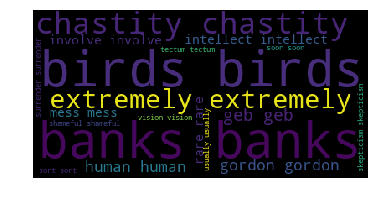

29


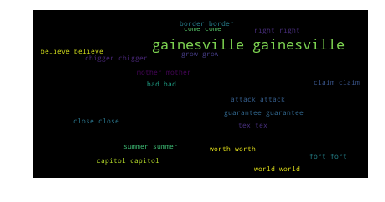

In [18]:
for i in range(clusters):
    print(i)
    cloud = ''
    for j in range(len(centers[i])):
        if centers[i][j] > 0.01:
            cloud += f'{feature_names[j]} ' * int(centers[i][j] * 100)
    wordcloud.generate(cloud)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()   

In [19]:
print(f'nclusters\t ntexts\t\tsum of squared distances of samples to their closest cluster center')
for nclusters in range(5, 40, 5):
    for countTexts in range(100, 1100, 200):
        kmeans = KMeans(n_clusters=nclusters, random_state=43).fit(norm_count_vect[:countTexts])
        print(f' {nclusters} \t\t {countTexts} \t\t {kmeans.inertia_}\n')

nclusters	 ntexts		sum of squared distances of samples to their closest cluster center
 5 		 100 		 90.32613084348142

 5 		 300 		 271.065368334225

 5 		 500 		 457.0279257796373

 5 		 700 		 643.8170736286157

 5 		 900 		 829.5739983098277

 10 		 100 		 84.36703048795955

 10 		 300 		 263.9386787090133

 10 		 500 		 449.69757343271743

 10 		 700 		 635.1043809713763

 10 		 900 		 817.9712483765214

 15 		 100 		 78.63242282255642

 15 		 300 		 257.1622314889523

 15 		 500 		 442.55653381122005

 15 		 700 		 628.5816465025705

 15 		 900 		 805.8452354933645

 20 		 100 		 73.17519731373994

 20 		 300 		 251.63128279314222

 20 		 500 		 437.1330648531674

 20 		 700 		 620.2745113540506

 20 		 900 		 800.9119651624247

 25 		 100 		 67.73164403506767

 25 		 300 		 255.84246953018018

 25 		 500 		 445.62753645626253

 25 		 700 		 612.1482815741111

 25 		 900 		 822.8741726366517

 30 		 100 		 62.610434533754926

 30 		 300 		 251.01531744305615

 30 		 500 		 423.740